### En tete a faire:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump

C:\Users\Harold_King\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('dataexport_20240509T015223.csv')
df.head(100)

,location,Bâle,Bâle.1,Bâle.2,Bâle.3,Bâle.4,Bâle.5,Bâle.6,Bâle.7,Bâle.8,Bâle.9,Bâle.10,Bâle.11,Bâle.12,Bâle.13,Bâle.14
0,lat,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000,47.75000
1,lon,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000,7.50000
2,asl,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653,363.653
3,variable,Temperature,Precipitation Total,Relative Humidity,Wind Gust,Wind Speed,Wind Direction,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,Sunshine Duration,Shortwave Radiation,UV Radiation,Mean Sea Level Pressure,Evapotranspiration,Soil Temperature
4,unit,°C,mm,%,km/h,km/h,°,%,%,%,min,W/m²,W/m²,hPa,mm,°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20230104T1400,10.0602455,0.0,75.00873,40.32,17.49615,216.63412,97.0,45.0,99.0,0.0,88.0,12.6,1028.7,0.0648,7.81
96,20230104T1500,10.200245,0.0,78.548965,40.68,17.610588,220.85538,98.0,15.0,100.0,0.0,55.0,5.46,1028.6,0.0432,7.8
97,20230104T1600,10.240245,0.0,82.32675,40.68,18.11841,220.97174,95.0,32.0,89.0,5.3939385,10.0,1.47,1028.4,0.02304,7.8
98,20230104T1700,10.200245,0.0,84.73022,40.68,18.626305,221.08176,96.0,56.0,79.0,0.0,0.0,0.0,1028.5,0.01872,7.79


# Transformations du Dataset en Timeseries

In [3]:
from datetime import datetime

def convert_to_date(sequence):
    # Définir le format de la séquence
    date_format = "%Y%m%dT%H"
    # Convertir la séquence en objet datetime
    
    date_obj = datetime.strptime(sequence[:-2], date_format)
    return date_obj


## Structuration de donnee :

In [4]:
df1 = df.copy()
localisation = df1.iloc[:3]
dataset = df1.iloc[9:]
colomns = df1.iloc[3].values
unite = df1.iloc[4].values
dataset = dataset.dropna(axis=0)
dataset.columns = colomns
dataset.index = np.arange(dataset.shape[0])
dataset.head(100)

,variable,Temperature,Precipitation Total,Relative Humidity,Wind Gust,Wind Speed,Wind Direction,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,Sunshine Duration,Shortwave Radiation,UV Radiation,Mean Sea Level Pressure,Evapotranspiration,Soil Temperature
0,20230101T0000,12.270246,0.0,80.82639,27.0,8.669949,175.23636,29.0,7.0,3.0,0.0,0.0,0.0,1021.4,0.00288,7.42
1,20230101T0100,12.340245,0.0,79.099785,28.08,8.209263,164.74487,2.0,22.0,0.0,0.0,0.0,0.0,1021.3,0.00432,7.44
2,20230101T0200,11.840245,0.0,80.655174,28.08,7.072878,165.25644,0.0,44.0,0.0,0.0,0.0,0.0,1021.5,0.00432,7.46
3,20230101T0300,11.550245,0.0,81.8313,27.0,7.342588,168.69006,0.0,22.0,1.0,0.0,0.0,0.0,1021.7,0.00432,7.48
4,20230101T0400,11.260245,0.0,81.17936,25.199999,8.049845,169.69516,0.0,4.0,0.0,0.0,0.0,0.0,1021.9,0.00288,7.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20230104T2300,10.720245,0.2,90.941864,45.0,16.992609,216.38435,95.0,84.0,100.0,0.0,0.0,0.0,1026.8,0.05904,7.78
96,20230105T0000,10.720245,0.0,91.43554,43.92,18.947083,218.82983,98.0,86.0,98.0,0.0,0.0,0.0,1026.4,0.05472,7.78
97,20230105T0100,10.800245,0.0,91.071,43.199997,19.602652,224.25595,98.0,95.0,98.0,0.0,0.0,0.0,1026.3,0.04608,7.78
98,20230105T0200,10.770246,0.1,91.81077,43.56,20.364674,225.0,99.0,99.0,92.0,0.0,0.0,0.0,1026.0,0.0432,7.78


In [5]:
df1 = df.copy()
dataset['variable'] = dataset['variable'].apply(lambda x: convert_to_date(x))
dataset.set_index('variable', inplace=True)
dataset = dataset.astype('float16')
dataset.head()

,Temperature,Precipitation Total,Relative Humidity,Wind Gust,Wind Speed,Wind Direction,Cloud Cover High,Cloud Cover Medium,Cloud Cover Low,Sunshine Duration,Shortwave Radiation,UV Radiation,Mean Sea Level Pressure,Evapotranspiration,Soil Temperature
variable,,,,,,,,,,,,,,,
2023-01-01 00:00:00,12.273438,0.0,80.8125,27.000000,8.671875,175.25,29.0,7.0,3.0,0.0,0.0,0.0,1021.5,0.002880,7.421875
2023-01-01 01:00:00,12.343750,0.0,79.1250,28.078125,8.210938,164.75,2.0,22.0,0.0,0.0,0.0,0.0,1021.5,0.004318,7.441406
2023-01-01 02:00:00,11.843750,0.0,80.6250,28.078125,7.074219,165.25,0.0,44.0,0.0,0.0,0.0,0.0,1021.5,0.004318,7.460938
2023-01-01 03:00:00,11.546875,0.0,81.8125,27.000000,7.343750,168.75,0.0,22.0,1.0,0.0,0.0,0.0,1021.5,0.004318,7.480469
2023-01-01 04:00:00,11.257812,0.0,81.1875,25.203125,8.046875,169.75,0.0,4.0,0.0,0.0,0.0,0.0,1022.0,0.002880,7.488281


# Elimination des colonnes non necessaires

In [6]:
dataset.drop(['Wind Direction', 'Wind Gust', 'Cloud Cover High', 'Cloud Cover Medium', 'Sunshine Duration', 'Shortwave Radiation'], axis=1, inplace=True)

In [7]:
parms = ['temperature','precipitation', 'humidity', 'wind_speed','couverture', 'uv','pressure','evapotranspiration', 'temperation_soil']
dataset.columns = parms
dataset.head()

,temperature,precipitation,humidity,wind_speed,couverture,uv,pressure,evapotranspiration,temperation_soil
variable,,,,,,,,,
2023-01-01 00:00:00,12.273438,0.0,80.8125,8.671875,3.0,0.0,1021.5,0.002880,7.421875
2023-01-01 01:00:00,12.343750,0.0,79.1250,8.210938,0.0,0.0,1021.5,0.004318,7.441406
2023-01-01 02:00:00,11.843750,0.0,80.6250,7.074219,0.0,0.0,1021.5,0.004318,7.460938
2023-01-01 03:00:00,11.546875,0.0,81.8125,7.343750,1.0,0.0,1021.5,0.004318,7.480469
2023-01-01 04:00:00,11.257812,0.0,81.1875,8.046875,0.0,0.0,1022.0,0.002880,7.488281


# Controle des valeurs manquantes

In [8]:
dataset.isna().sum(0)

temperature           0
precipitation         0
humidity              0
wind_speed            0
couverture            0
uv                    0
pressure              0
evapotranspiration    0
temperation_soil      0
dtype: int64

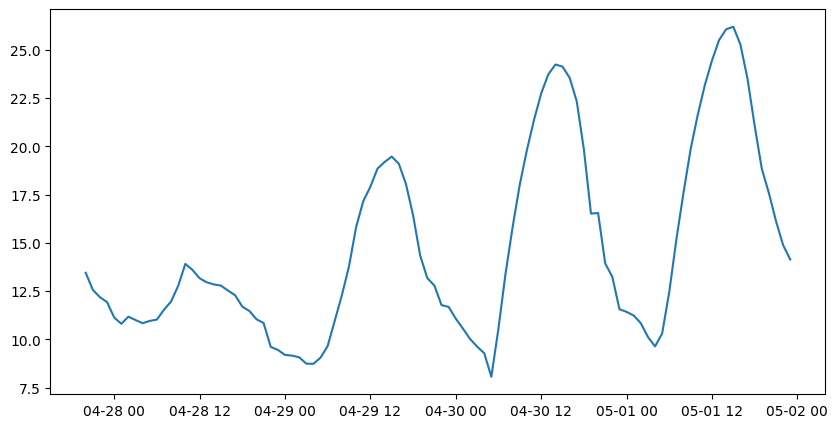

In [9]:
plt.figure(figsize=(10,5))
plt.plot(dataset['temperature'].iloc[-100:]);

# Preparation des donnees d'entrainement

In [10]:
feature_keys = parms

In [11]:
def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

In [12]:
print(
    "The selected parameters are:",
    ", ".join([feature_keys[i] for i in range(len(feature_keys))]),
)

features = dataset[feature_keys]
features.head()

The selected parameters are: temperature, precipitation, humidity, wind_speed, couverture, uv, pressure, evapotranspiration, temperation_soil


,temperature,precipitation,humidity,wind_speed,couverture,uv,pressure,evapotranspiration,temperation_soil
variable,,,,,,,,,
2023-01-01 00:00:00,12.273438,0.0,80.8125,8.671875,3.0,0.0,1021.5,0.002880,7.421875
2023-01-01 01:00:00,12.343750,0.0,79.1250,8.210938,0.0,0.0,1021.5,0.004318,7.441406
2023-01-01 02:00:00,11.843750,0.0,80.6250,7.074219,0.0,0.0,1021.5,0.004318,7.460938
2023-01-01 03:00:00,11.546875,0.0,81.8125,7.343750,1.0,0.0,1021.5,0.004318,7.480469
2023-01-01 04:00:00,11.257812,0.0,81.1875,8.046875,0.0,0.0,1022.0,0.002880,7.488281


In [13]:
def df_to_XY(training_set, target,window_size=24):
    X_train=[]
    y_train=[]
    for i in range(window_size,training_set.shape[0]-window_size):
        X_train.append(training_set[target].iloc[i-window_size:i])
        y_train.append(training_set[target].iloc[i])
    
    X_train, y_train = np.array(X_train), np.array(y_train)
    return X_train, y_train

In [14]:
# Votre tableau initial
weather_conditions = np.array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
                               'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
                               'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
                               'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
                               'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
                               'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
                               'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
                               'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
                               'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
                               'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
                               'Thunderstorms,Rain,Fog',
                               'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
                               'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
                               'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
                               'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
                               'Drizzle,Snow,Fog', 'Rain,Snow Grains', 'Rain,Snow,Ice Pellets',
                               'Snow Showers,Fog', 'Moderate Snow,Blowing Snow'], dtype=object)

# Dictionnaire de traduction
translations = {
    'Fog': 'Brouillard',
    'Freezing Drizzle': 'Bruine Verglaçante',
    'Mostly Cloudy': 'Principalement Nuageux',
    'Cloudy': 'Nuageux',
    'Rain': 'Pluie',
    'Rain Showers': 'Averses de Pluie',
    'Mainly Clear': 'Principalement Dégagé',
    'Snow Showers': 'Averses de Neige',
    'Snow': 'Neige',
    'Clear': 'Dégagé',
    'Freezing Rain': 'Pluie Verglaçante',
    'Rain,Snow': 'Pluie,Neige',
    'Moderate Snow': 'Neige Modérée',
    'Snow,Blowing Snow': 'Neige,Neige Soufflée',
    'Freezing Fog': 'Brouillard Verglaçant',
    'Haze': 'Brume',
    'Rain,Fog': 'Pluie,Brouillard',
    'Drizzle,Fog': 'Bruine,Brouillard',
    'Drizzle': 'Bruine',
    'Freezing Drizzle,Haze': 'Bruine Verglaçante,Brume',
    'Freezing Rain,Haze': 'Pluie Verglaçante,Brume',
    'Snow,Haze': 'Neige,Brume',
    'Snow,Fog': 'Neige,Brouillard',
    'Snow,Ice Pellets': 'Neige,Granules de Glace',
    'Rain,Haze': 'Pluie,Brume',
    'Thunderstorms,Rain': 'Orages,Pluie',
    'Thunderstorms,Rain Showers': 'Orages,Averses de Pluie',
    'Thunderstorms,Heavy Rain Showers': 'Orages,Fortes Averses de Pluie',
    'Thunderstorms,Rain Showers,Fog': 'Orages,Averses de Pluie,Brouillard',
    'Thunderstorms': 'Orages',
    'Thunderstorms,Rain,Fog': 'Orages,Pluie,Brouillard',
    'Thunderstorms,Moderate Rain Showers,Fog': 'Orages,Averses de Pluie Modérées,Brouillard',
    'Rain Showers,Fog': 'Averses de Pluie,Brouillard',
    'Rain Showers,Snow Showers': 'Averses de Pluie,Averses de Neige',
    'Snow Pellets': 'Granules de Neige',
    'Rain,Snow,Fog': 'Pluie,Neige,Brouillard',
    'Moderate Rain,Fog': 'Pluie Modérée,Brouillard',
    'Freezing Rain,Ice Pellets,Fog': 'Pluie Verglaçante,Granules de Glace,Brouillard',
    'Drizzle,Ice Pellets,Fog': 'Bruine,Granules de Glace,Brouillard',
    'Drizzle,Snow': 'Bruine,Neige',
    'Rain,Ice Pellets': 'Pluie,Granules de Glace',
    'Drizzle,Snow,Fog': 'Bruine,Neige,Brouillard',
    'Rain,Snow Grains': 'Pluie,Grains de Neige',
    'Rain,Snow,Ice Pellets': 'Pluie,Neige,Granules de Glace',
    'Snow Showers,Fog': 'Averses de Neige,Brouillard',
    'Moderate Snow,Blowing Snow': 'Neige Modérée,Neige Soufflée'
}

# Traduction des conditions météorologiques
def translated_conditions(condition):
    return ', '.join(translations.get(cond.strip(), cond) for cond in condition.split(','))

# Afficher le résultat
print(translated_conditions('Snow Showers,Fog'))


Averses de Neige, Brouillard


In [15]:
weather_df = pd.read_csv('Weather Data.csv')
weather_df['Weather'] = weather_df['Weather'].apply(lambda x: translated_conditions(x))
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Brouillard
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Brouillard
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Bruine Verglaçante, Brouillard"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Bruine Verglaçante, Brouillard"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Brouillard


In [16]:
target = 'Visibility_km'
X, y = df_to_XY(weather_df, target)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
x_train.shape

(6988, 24)

# Model et entrainement

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam',loss='mean_squared_error',  metrics=['accuracy'])
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 24, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 24, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

# Entrainement

In [20]:
history=regressor.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50
197/197 [==============================] - 12s 31ms/step - loss: 467.0428 - accuracy: 0.0016 - val_loss: 250.4913 - val_accuracy: 0.0000e+00
Epoch 2/50
197/197 [==============================] - 6s 28ms/step - loss: 236.1485 - accuracy: 0.0016 - val_loss: 169.5827 - val_accuracy: 0.0000e+00
Epoch 3/50
197/197 [==============================] - 5s 26ms/step - loss: 152.8907 - accuracy: 0.0016 - val_loss: 105.0444 - val_accuracy: 0.0000e+00
Epoch 4/50
197/197 [==============================] - 5s 26ms/step - loss: 111.2969 - accuracy: 0.0016 - val_loss: 78.1783 - val_accuracy: 0.0000e+00
Epoch 5/50
197/197 [==============================] - 6s 32ms/step - loss: 83.9085 - accuracy: 0.0016 - val_loss: 59.3557 - val_accuracy: 0.0000e+00
Epoch 6/50
197/197 [==============================] - 5s 27ms/step - loss: 66.8847 - accuracy: 0.0016 - val_loss: 51.3121 - val_accuracy: 0.0000e+00
Epoch 7/50
197/197 [==============================] - 6s 29ms/step - loss: 57.8891 - accuracy: 0.0


KeyboardInterrupt



# Visualisation

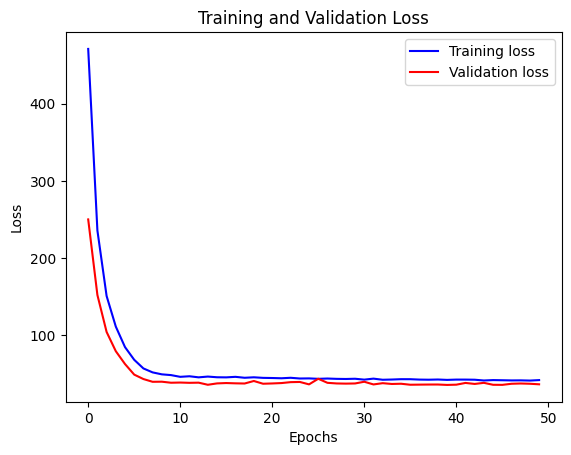

In [40]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

# Prediction

In [41]:
train_pred = regressor.predict(x_train)
#val_pred = regressor.predict(x_val).flatten()
test_pred = regressor.predict(x_test)

55/55 [==============================] - 1s 9ms/step


In [24]:
from joblib import load
model = load('Weather_project/save_model/model_evapotranspiration.joblib')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 24, 50)            10400     
                                                                 
 dropout_36 (Dropout)        (None, 24, 50)            0         
                                                                 
 lstm_37 (LSTM)              (None, 24, 50)            20200     
                                                                 
 dropout_37 (Dropout)        (None, 24, 50)            0         
                                                                 
 lstm_38 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_38 (Dropout)        (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 1)               

In [2]:
train_pred = model.predict(x_train)
#val_pred = regressor.predict(x_val).flatten()
test_pred = model.predict(x_test)

NameError: name 'x_train' is not defined

In [42]:
'''pred = np.concatenate([train_pred, test_pred])
d = np.array([target.tolist(), pred.tolist()])
df_pred = pd.DataFrame(d.transpose(), columns=['actual', 'predicted'])

df_pred.head()'''

"pred = np.concatenate([train_pred, test_pred])\nd = np.array([target.tolist(), pred.tolist()])\ndf_pred = pd.DataFrame(d.transpose(), columns=['actual', 'predicted'])\n\ndf_pred.head()"

In [43]:
'''n = train_pred.shape[0]

fig,axes = plt.subplots(3,1,figsize=(14,8),dpi=400)

plt.subplot(3,1,1)
plt.plot(dataset['Temperature'].iloc[n-24:n+10]);

plt.subplot(3,1,2)
plt.title("Test Results Scatter")
plt.plot(df_pred[n-24:n],alpha=0.4,linestyle='-.');
for i in range(10):
    plt.scatter(n+i, df_pred['actual'].iloc[n+i], s=10, color='r', label='actual')
    plt.scatter(n+i, df_pred['predicted'].iloc[n+i], s=10, color='b', alpha=0.4, label='predicted')

plt.subplot(3,1,3)
plt.title("Test Results Future")
plt.plot(df_pred[n:n+24],alpha=0.4,linestyle='-.');
plt.legend();'''

'n = train_pred.shape[0]\n\nfig,axes = plt.subplots(3,1,figsize=(14,8),dpi=400)\n\nplt.subplot(3,1,1)\nplt.plot(dataset[\'Temperature\'].iloc[n-24:n+10]);\n\nplt.subplot(3,1,2)\nplt.title("Test Results Scatter")\nplt.plot(df_pred[n-24:n],alpha=0.4,linestyle=\'-.\');\nfor i in range(10):\n    plt.scatter(n+i, df_pred[\'actual\'].iloc[n+i], s=10, color=\'r\', label=\'actual\')\n    plt.scatter(n+i, df_pred[\'predicted\'].iloc[n+i], s=10, color=\'b\', alpha=0.4, label=\'predicted\')\n\nplt.subplot(3,1,3)\nplt.title("Test Results Future")\nplt.plot(df_pred[n:n+24],alpha=0.4,linestyle=\'-.\');\nplt.legend();'

In [53]:
def visual_result(n):
    plt.figure(figsize=(15, 8))

    plt.subplot(2,1,1)
    for i in range(800, 1000):
        plt.title('Train Result')
        plt.plot(np.arange(i,n+i),x_train[i], alpha=.1, marker='o')
        plt.scatter(n+10+i, y_train[10+i], s=50, color='r')
        plt.scatter(58+i, train_pred[10+i], s=10, color='g')

    plt.subplot(2,1,2)
    plt.title('Test result')
    for i in range(100):
        plt.plot(np.arange(i,n+i),x_test[i], alpha=.1, marker='o')
        plt.scatter(n+10+i, y_test[10+i], s=50, color='r')
        plt.scatter(n+10+i, test_pred[10+i], s=10, color='g')

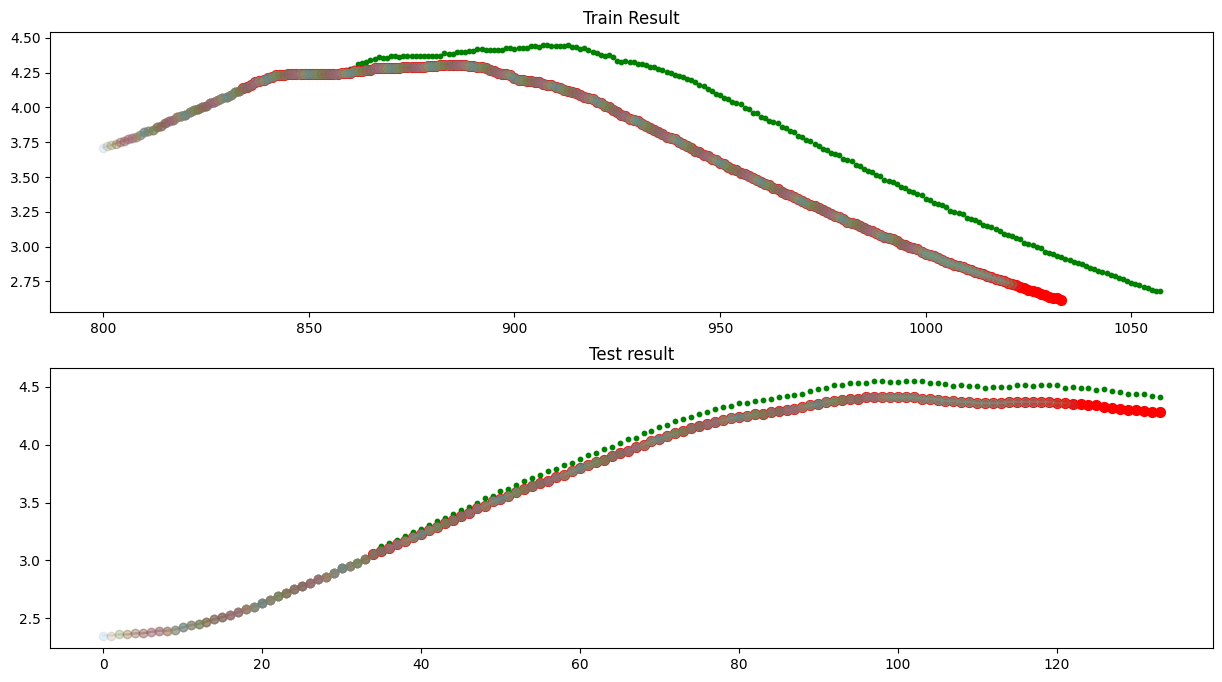

In [54]:
visual_result(24)

# Entrainement et sauvegarde des model en boucle

In [ ]:
parms = ['temperature','precipitation', 'humidity', 'wind_speed','couverture', 'uv','pressure','evapotranspiration', 'temperation_soil']
for parm in parms:
    print(parm)
    X, y = df_to_XY(features, parm, 24)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))

    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))

    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam',loss='mean_squared_error')
    regressor.summary()
    
    history=regressor.fit(x_train, y_train, validation_split=0.1, epochs=50, batch_size=32)
    #visualize_loss(history, "Training and Validation Loss")
    
    #train_pred = regressor.predict(x_train)
    #test_pred = regressor.predict(x_test)
    #visual_result()
    
    dump(regressor, f'Weather_project/save_model/model_{parm}.joblib')

temperature
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 24, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 24, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 24, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)    

C:\Users\Harold_King\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Harold_King\Anaconda3\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


262/262 [==============================] - 7s 27ms/step - loss: 1.7148 - val_loss: 0.4824
Epoch 23/50
262/262 [==============================] - 6s 25ms/step - loss: 1.7371 - val_loss: 0.4743
Epoch 24/50
262/262 [==============================] - 7s 27ms/step - loss: 1.7699 - val_loss: 0.4358
Epoch 25/50
262/262 [==============================] - 7s 25ms/step - loss: 1.6432 - val_loss: 0.4615
Epoch 26/50
262/262 [==============================] - 7s 27ms/step - loss: 1.6684 - val_loss: 0.3878
Epoch 27/50
262/262 [==============================] - 7s 26ms/step - loss: 1.6921 - val_loss: 0.5745
Epoch 28/50
262/262 [==============================] - 7s 26ms/step - loss: 1.6987 - val_loss: 0.4196
Epoch 29/50
262/262 [==============================] - 7s 29ms/step - loss: 1.7215 - val_loss: 0.3986
Epoch 30/50
262/262 [==============================] - 7s 26ms/step - loss: 1.7079 - val_loss: 0.6665
Epoch 31/50
262/262 [==============================] - 7s 28ms/step - loss: 1.6513 - val_loss:

In [ ]:
import sched
import time

In [ ]:
planificateur = sched.scheduler(time.time, time.sleep)
def exer():
    print('5min')

def planifier_execution():
    planificateur.enter(300,1, planifier_execution)
    exer()
    
planifier_execution()

planificateur.run()

In [ ]:
y_test.reshape(y_test.shape[0],1).shape

In [ ]:
test_pred.shape

In [ ]:
from joblib import dump
dump(regressor, f'Weather_project/save_model/model_visibility.joblib')